In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [6]:
from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/My Drive/SKS ML project/Telco_Customer_Churn_clean.csv")
df = pd.read_csv("/../datasets/Telco_Customer_Churn_clean.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [7]:
X=df.drop('Churn', axis=1)
y=df['Churn']
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.value_counts())



Churn
0    4130
1    1495
Name: count, dtype: int64


In [8]:
y_test.value_counts()


,count
Churn,
0,1033
1,374


In [9]:
df['Churn'].value_counts()


,count
Churn,
0,5163
1,1869


In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


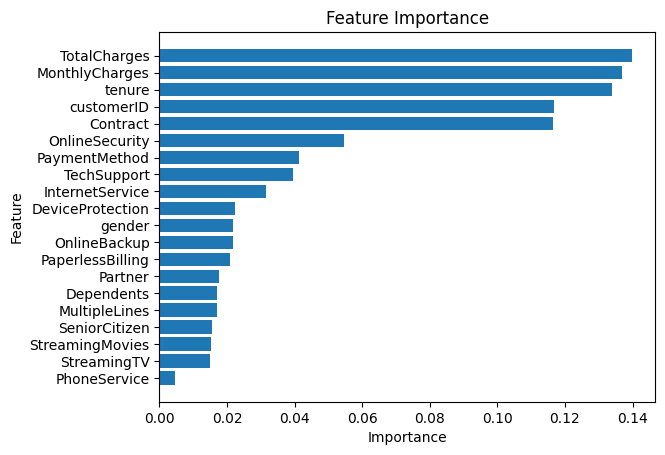

In [11]:
rf=RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
importance=pd.DataFrame(
    {
        "Feature": X_train.columns,
        "Importance": rf.feature_importances_
    }
).sort_values(by="Importance", ascending=True)
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


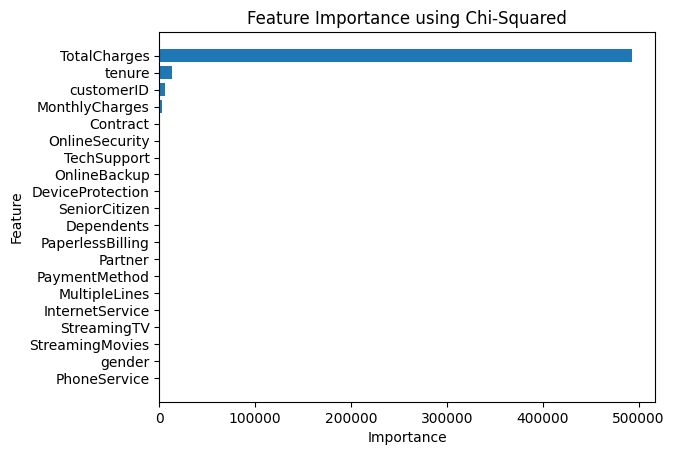

In [12]:
from sklearn.feature_selection import SelectKBest ,chi2
selector=SelectKBest(score_func=chi2, k='all')
selector.fit_transform(X_train, y_train)
importance=pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": selector.scores_
}).sort_values(by="Importance", ascending=True)
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Chi-Squared')
plt.show()


Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


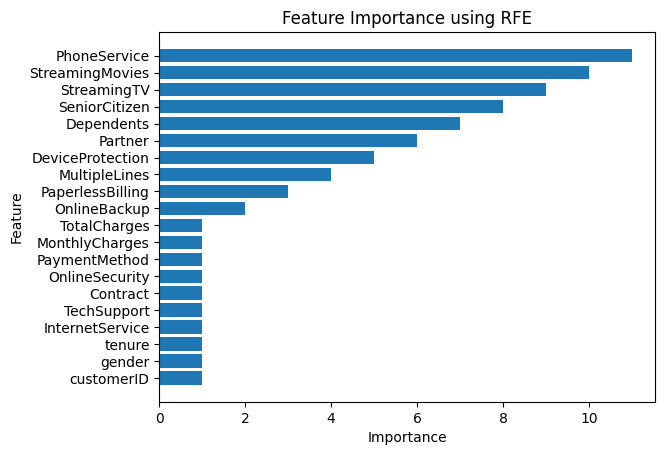

In [13]:
from sklearn.feature_selection import RFE
rfe_selector=RFE(estimator=RandomForestClassifier(class_weight='balanced', random_state=42),verbose=2,)
rfe_selector.fit_transform(X_train, y_train)
importance=pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rfe_selector.ranking_
}).sort_values(by="Importance", ascending=True)
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using RFE')
plt.show()


In [14]:
df=df.drop('customerID', axis=1)


In [15]:
#df.to_csv("/content/drive/My Drive/SKS ML project/Telco_Customer_Churn_feature_selected.csv", index=False)
df.to_csv("/../datasets/Telco_Customer_Churn_feature_selected.csv", index=False)
